**1. Problem Statement**

The objective is to detect hate speech in tweets. For simplicity, I define hate speech as tweets with racist or sexist sentiments. Therefore, my task is to classify racist or sexist tweets from others. Formally, given a training sample of tweets and labels (where '1' means racist/sexist and '0' means not), my goal is to predict the labels on the test dataset.

In [ ]:
%pip install seaborn
%pip install matplotlib

In [3]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv(r'C:\Users\HP\Desktop\MLops\Twitter Sentiment Analysis\Data\train.csv')
test = pd.read_csv(r'C:\Users\HP\Desktop\MLops\Twitter Sentiment Analysis\Data\test.csv')

**2. Tweets Preprocessing and Cleaning**

***2.1 Data Inspection***


Checking few not racist/sexist tweet.

In [12]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [11]:
train[train['label'] == 0].head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
train[train['label'] == 1].head(5)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [13]:
train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

Here, class imbalance present. Checking the distribution the lenght of the tweets, in terms of words, in train and test data.

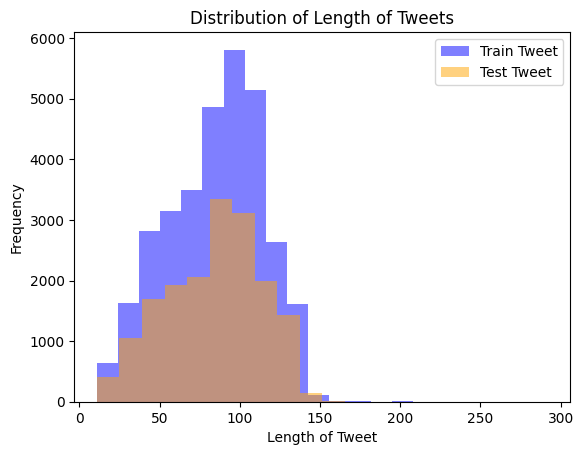

In [16]:
lenghth_train = train['tweet'].str.len()
lenghth_test = test['tweet'].str.len()
plt.hist(lenghth_train, bins=20, alpha=0.5, label='Train Tweet', color='blue')
plt.hist(lenghth_test, bins=20, alpha=0.5, label='Test Tweet', color='orange')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Tweets')
plt.legend()
plt.show()

***2.2 Data Clenning***


This will involve steps such as:

Lowercasing: Converting all text to lowercase to ensure consistency and treat words like "Hate" and "hate" as the same.

Removing URLs and Mentions: Eliminating web addresses and user mentions (@user) as they typically don't contribute to the sentiment of the tweet.

Removing Punctuation and Special Characters: Stripping away symbols and characters that are not relevant for sentiment analysis.

Tokenization: Breaking down the text into individual words or "tokens."

Stop Word Removal: Eliminating common words (e.g., "the," "is," "and") that carry little semantic meaning.

Stemming/Lemmatization (Optional but Recommended): Reducing words to their root form to further reduce dimensionality and improve consistency (e.g., "running," "runs," "ran" to "run").

In [18]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape

AttributeError: 'DataFrame' object has no attribute 'append'